In [ ]:
# Start writing code here...

## Question: Are our customers responsive to a credit card offer? YES or NO?

## Target: "Offer Accepted"

### Key steps:

- Renaming cols

- Checking the shape, info, types

- Check if there are null values/ space/Nan (decide about handling them=> imputation)

- Check if there are duplicates

- Separate Numerical and Categorical

- Check the distribution of numerical

- Transform the numerical (normalise, standardised log, boxcox, etc)

- Check the distribution of categorical

- Chi-squre for categorical to understand associations

- Encoding categorical

- Concat numerical & Categorical

- Check target --> imbalance data --> work on it using balancing the data etc.

- Separate target and feature

- Train/test split

- Modeling

- Evaluating the model results

## Importing the data and first exploration

Here we import the data through the Excel file (which worked better than the CSV file) and do some first checks and basic clean up.

- Import the data

- Drop customer_number (after checking that it is customer_id with 18,000 values). We don't need it for the model.

- Check that the column average balance is in fact the average of quarterly balance numbers.

- Standardise the column names

- Check the shape of the dataframe and the basic information on the variables

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Read Excel file (the column names when we read the CSV file don't make sense so we decided to read the excel file, here we have proper column names).

In [ ]:
!pip install openpyxl

data_excel= pd.read_excel('creditcardmarketing.xlsx')
data_excel.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 39.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


Checking the balance column to ensure the average balance column is correct by calculating the avarage of the 4 quarterly balance columns.

In [ ]:
#Adding a new column at the end to calcumate the average of the last 4 cols with iloc
data_excel['New_Avg_Balance'] = data_excel.loc[:, 'Q1 Balance':'Q4 Balance'].mean(axis=1)
data_excel.sample(10)

#Seems like the existing avg col was correct.

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,New_Avg_Balance
6219,6220,No,Cash Back,Letter,High,1,No,Low,1,1,2,Yes,1013.25,1912.0,1279.0,683.0,179.0,1013.25
4322,4323,No,Air Miles,Letter,Medium,1,No,Low,1,2,4,No,1063.00,1864.0,1367.0,718.0,303.0,1063.00
2616,2617,No,Points,Postcard,Low,2,No,Low,2,2,2,No,996.75,531.0,831.0,1013.0,1612.0,996.75
12227,12228,No,Points,Letter,High,1,No,Low,2,2,4,Yes,1006.25,1531.0,1392.0,680.0,422.0,1006.25
13971,13972,No,Points,Postcard,Medium,2,No,Low,4,1,3,Yes,1012.00,1563.0,1349.0,902.0,234.0,1012.00
17692,17693,No,Air Miles,Letter,Low,1,No,High,2,1,2,No,1030.00,1426.0,1179.0,968.0,547.0,1030.00
6562,6563,No,Cash Back,Postcard,Low,1,No,Low,3,1,3,Yes,952.75,1752.0,1148.0,908.0,3.0,952.75
11221,11222,Yes,Points,Postcard,Low,1,No,High,2,1,2,Yes,1344.75,1933.0,1314.0,1352.0,780.0,1344.75
9702,9703,No,Points,Letter,High,2,No,High,1,2,2,Yes,936.75,264.0,1495.0,1535.0,453.0,936.75
6807,6808,Yes,Air Miles,Postcard,High,1,No,Low,1,1,4,Yes,1013.25,426.0,1262.0,986.0,1379.0,1013.25


Standardising column names by replacing spaces for underscores and removing capital letters.

In [ ]:
data_excel.columns = data_excel.columns.str.replace(' ', '_').str.lower()
data_excel.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,new_avg_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,1160.75
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,147.25
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,276.50
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,1219.00
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,1211.00


Checking the number of rows (18.000) and columns (18).

In [ ]:
data_excel.shape

(18000, 18)

Getting familiar with the different variables and their data types, we see we have a mix of numerical and categorical variables.

In [ ]:
data_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   #_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   #_credit_cards_held   18000 non-null  int64  
 9   #_homes_owned         18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [ ]:
from tabulate import tabulate
headers = ["Column", "Non-Null Count", "Dtype"]
data = [(col, data_excel[col].count(), data_excel[col].dtype) for col in data_excel.columns]

print(tabulate(data, headers=headers, tablefmt="pretty"))

+----------------------+----------------+---------+
|        Column        | Non-Null Count |  Dtype  |
+----------------------+----------------+---------+
|   customer_number    |     18000      |  int64  |
|    offer_accepted    |     18000      | object  |
|        reward        |     18000      | object  |
|     mailer_type      |     18000      | object  |
|     income_level     |     18000      | object  |
| #_bank_accounts_open |     18000      |  int64  |
| overdraft_protection |     18000      | object  |
|    credit_rating     |     18000      | object  |
| #_credit_cards_held  |     18000      |  int64  |
|    #_homes_owned     |     18000      |  int64  |
|    household_size    |     18000      |  int64  |
|    own_your_home     |     18000      | object  |
|   average_balance    |     17976      | float64 |
|      q1_balance      |     17976      | float64 |
|      q2_balance      |     17976      | float64 |
|      q3_balance      |     17976      | float64 |
|      q4_ba

### Understanding the different values for each variable and their respective counts

Offer accepted, our target, is highly imbalanced, with most customers not accepting the offer. It is a binary categorical variable.

In [ ]:
data_excel['offer_accepted'].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

We can see that there are three types of reward and that this is a nominal categorical variable.

In [ ]:
data_excel['reward'].value_counts()

Air Miles    6061
Cash Back    5999
Points       5940
Name: reward, dtype: int64

Two mailing options, postcard and letter in the categorical variable mailer type. 

In [ ]:
data_excel['mailer_type'].value_counts()

Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64

Income level is an ordinal categorical variable, with 3 different income levels.

In [ ]:
data_excel['income_level'].value_counts()

Medium    9013
High      4526
Low       4461
Name: income_level, dtype: int64

Again, number of bank accounts open is an ordinal numerical variable, going from 1 to 3. 

In [ ]:
data_excel['#_bank_accounts_open'].value_counts()

1    13692
2     4012
3      296
Name: #_bank_accounts_open, dtype: int64

Overdraft protection is a binary categorical variable.

In [ ]:
data_excel['overdraft_protection'].value_counts()


No     15322
Yes     2678
Name: overdraft_protection, dtype: int64

Credit rating is an ordinal categorical variable. 

In [ ]:
data_excel['credit_rating'].value_counts()

High      6071
Medium    5972
Low       5957
Name: credit_rating, dtype: int64

Own your home is binary categorical variable.

In [ ]:
data_excel['own_your_home'].value_counts()

Yes    11655
No      6345
Name: own_your_home, dtype: int64

Number of homes owned is an ordinal numerical variable.

In [ ]:
data_excel['#_homes_owned'].value_counts()


1    14523
2     3292
3      185
Name: #_homes_owned, dtype: int64

Household size is an ordinal numerical variable, going from 1 to 9. 

In [ ]:
data_excel['household_size'].value_counts()


3    5712
4    5543
5    2853
2    2813
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64

### Dropping the customer number variable, as it acts as an ID

In [ ]:
data_excel = data_excel.drop(['customer_number'], axis=1)

### Checking statistical features of our variables

In [ ]:
data_excel.describe()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,new_avg_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803,940.515562
std,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365,350.297837
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000,48.250000
25%,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000,787.500000
50%,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000,1007.000000
75%,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000,1153.250000
max,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000,3366.250000


### Checking null values

We can see that we have nulls in the balance columns.

In [ ]:
data_excel.isna().sum() 

offer_accepted           0
reward                   0
mailer_type              0
income_level             0
#_bank_accounts_open     0
overdraft_protection     0
credit_rating            0
#_credit_cards_held      0
#_homes_owned            0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
new_avg_balance         24
dtype: int64

### How should we handle nulls in balance cols?

We have decided to drop null values, as they represent 24 rows out of 18.000, which represents < 1% of the data.

In [ ]:
data_excel = data_excel.dropna().reset_index(drop=True)

Here we check the number of rows to understand the impact of removing null values, and we can see that only 24 rows were lost.

In [ ]:
len(data_excel)

17976

### Checking duplicate values

We can see that there are no duplicate values in the data.

In [ ]:
data_excel.duplicated().any()

False

### Separating the data between numerical and categorical variables to work on each data type appropriately

Defining our numerical dataframe:

In [ ]:
numerical= data_excel.select_dtypes(include = np.number)
numerical.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,new_avg_balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,1160.75
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0,147.25
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0,276.50
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,1219.00
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,1211.00


Defining our categorical dataframe:

In [ ]:
categorical= data_excel.select_dtypes(include = np.object)
categorical.head()

/tmp/ipykernel_139/1677763615.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical= data_excel.select_dtypes(include = np.object)


,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes


## Working on numerical varibles

### Checking the Correlation Matrix

Building our correlation matrix for the numerical dataframe

In [ ]:
corr_matrix = numerical.corr()

Plotting our correlation matrix to check our correlations

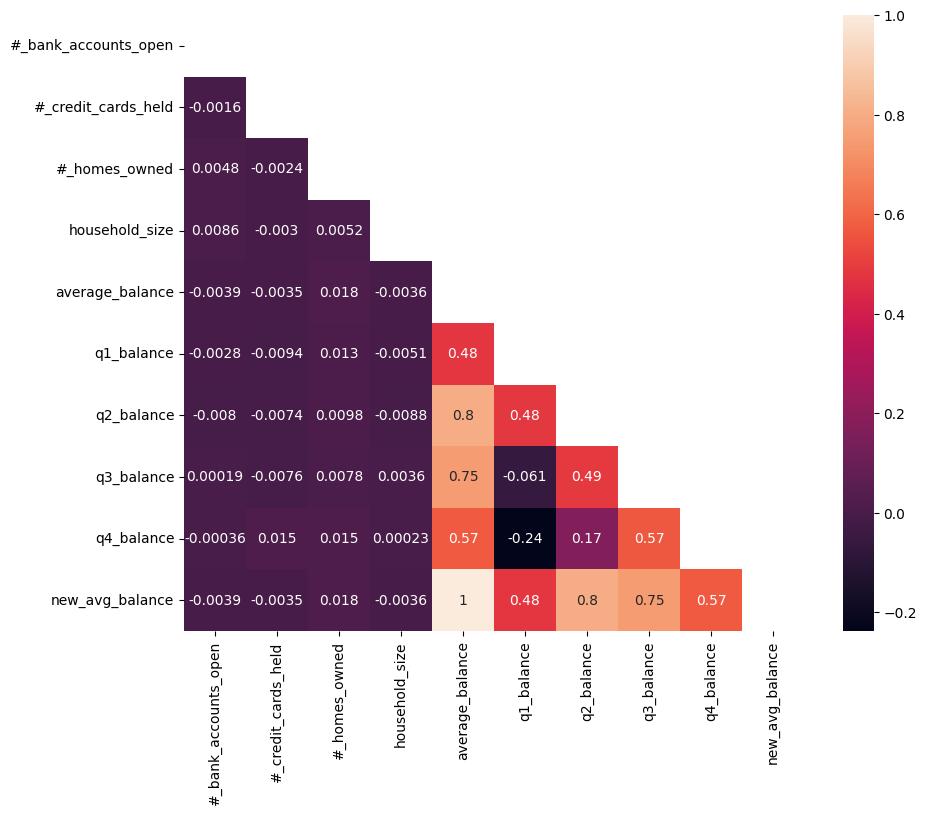

In [ ]:
mask = np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numerical.corr(), mask=mask, annot=True)
plt.show()

We can see that the Balance columns are strongly correlated in most cases, so we will try inputting only average balance OR the quarterly balance numbers, but not both simultaneously.

- Accordingly, we define a numerical_v1 dataframe with average_balance only (no quarterly balance data)

In [ ]:
numerical_v1 = numerical.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance', 'new_avg_balance'], axis=1)
numerical_v1.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
0,1,2,1,4,1160.75
1,1,2,2,5,147.25
2,2,2,1,2,276.50
3,2,1,1,4,1219.00
4,1,2,1,6,1211.00


- And we also define a numerical_v2 dataframe, dropping average_balance and including quarterly balance only.

In [ ]:
numerical_v2 = numerical.drop(['new_avg_balance', 'average_balance'], axis=1)
numerical_v2.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,1,4,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,39.0,106.0,78.0,366.0
2,2,2,1,2,367.0,352.0,145.0,242.0
3,2,1,1,4,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,2140.0,1357.0,982.0,365.0


### Checking the distribution of numerical variables through histograms

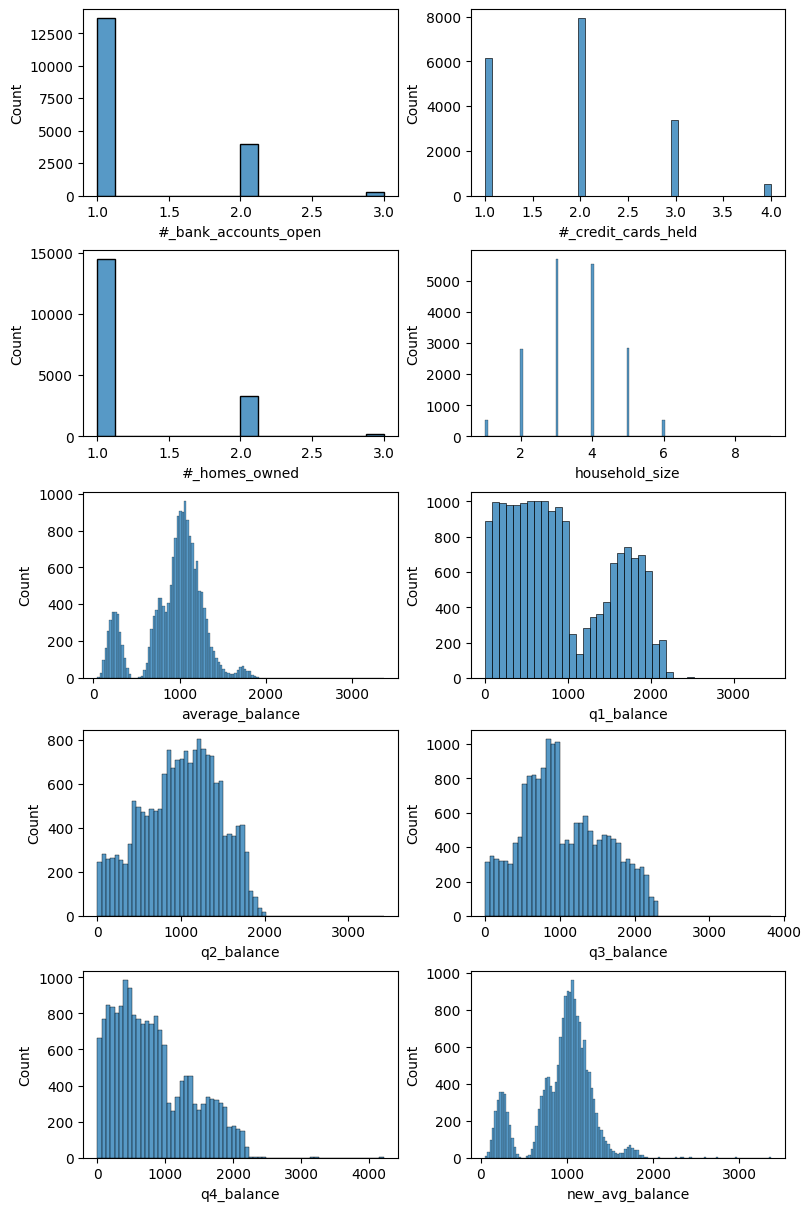

In [ ]:
fig = plt.figure(figsize = (8, 12), constrained_layout = True)

for i, column in enumerate(numerical.columns):
    fig.add_subplot(5, 2, i + 1) 
    sns.histplot(numerical[column])

From the plots above, we can see that average_balance is a continuous variable and the rest are discrete. We should take this into account in case we apply any transformation to the numerical data.

### Double-checking the distribution of numericals with Seaborn plots

We can see that there is scope to make the distributions of the balance columns more normal. 

/tmp/ipykernel_139/1908576190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


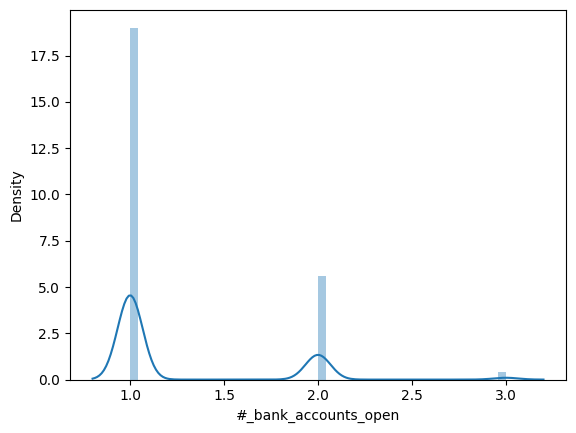

/tmp/ipykernel_139/1908576190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


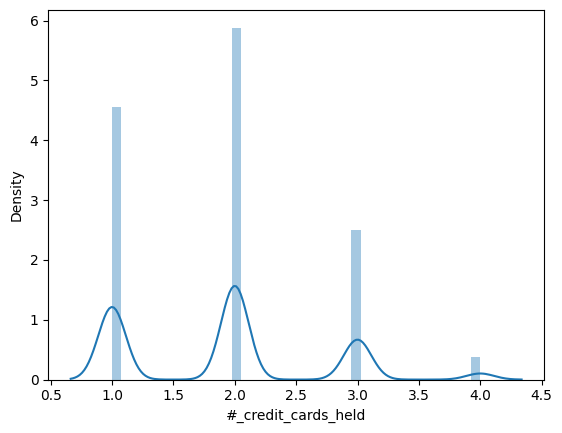

/tmp/ipykernel_139/1908576190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


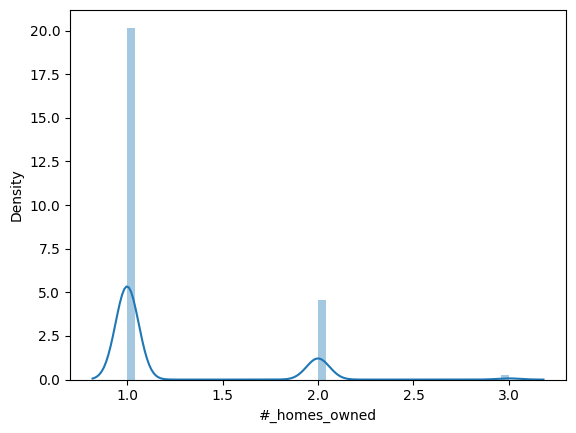

/tmp/ipykernel_139/1908576190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


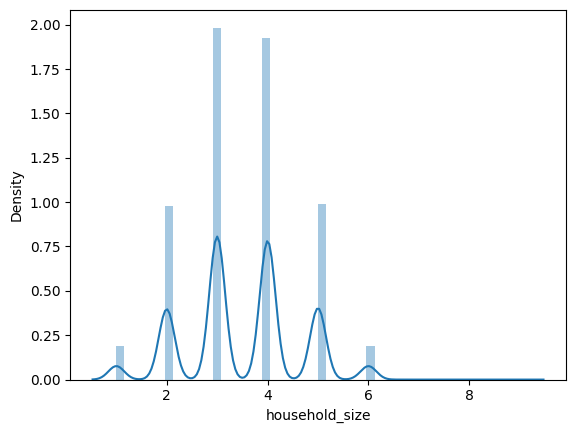

/tmp/ipykernel_139/1908576190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


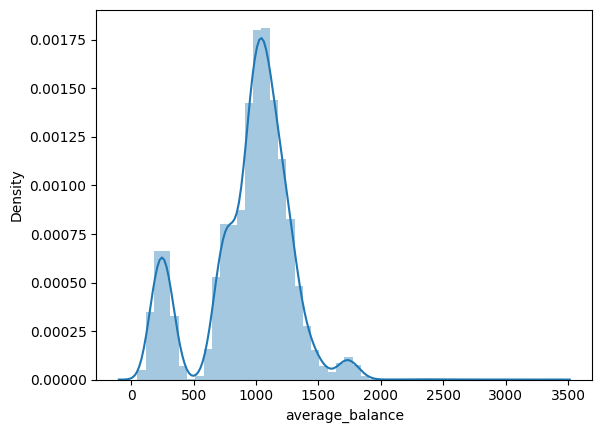

/tmp/ipykernel_139/1908576190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


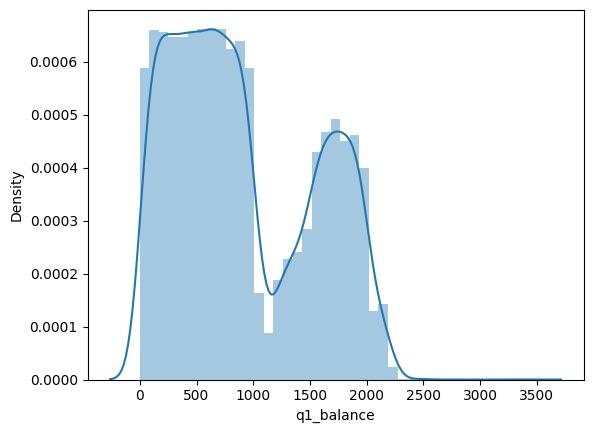

/tmp/ipykernel_139/1908576190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


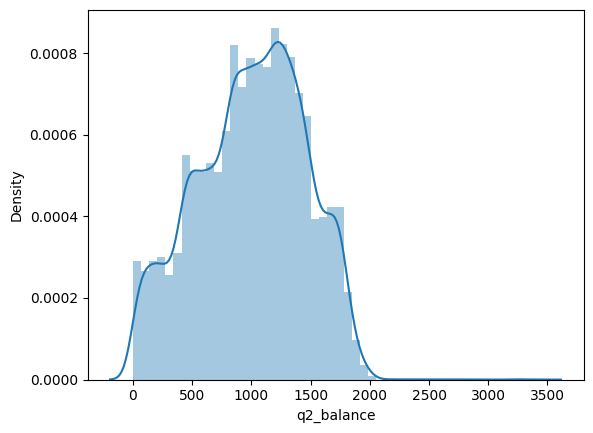

/tmp/ipykernel_139/1908576190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


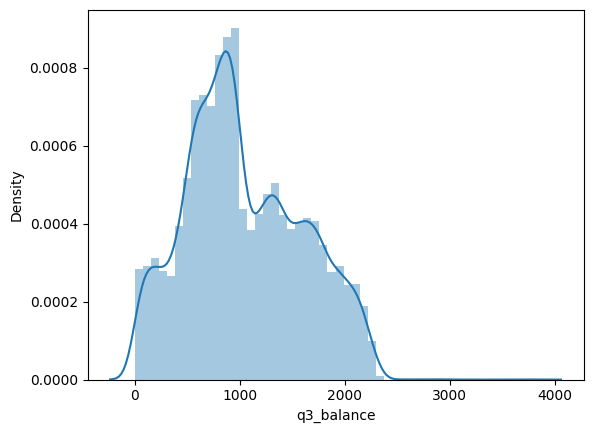

/tmp/ipykernel_139/1908576190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


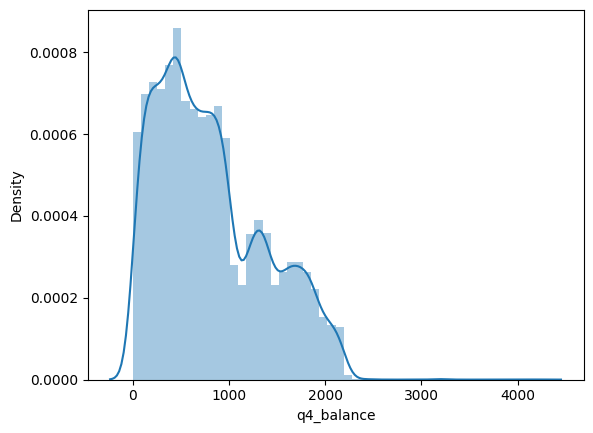

/tmp/ipykernel_139/1908576190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column])


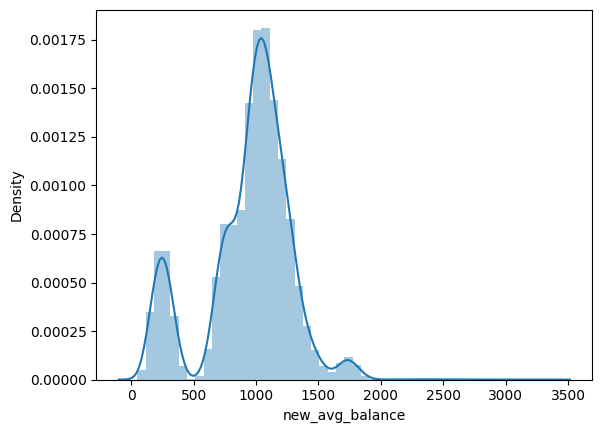

In [ ]:
for column in numerical.columns:
    sns.distplot(numerical[column])

    plt.show()

### Plotting numericals in a box plot to understand their distribution, with a focus on outliers

We can see that the balance columns have presence of outliers, so we will have to deal with those. 

<function matplotlib.pyplot.show(close=None, block=None)>

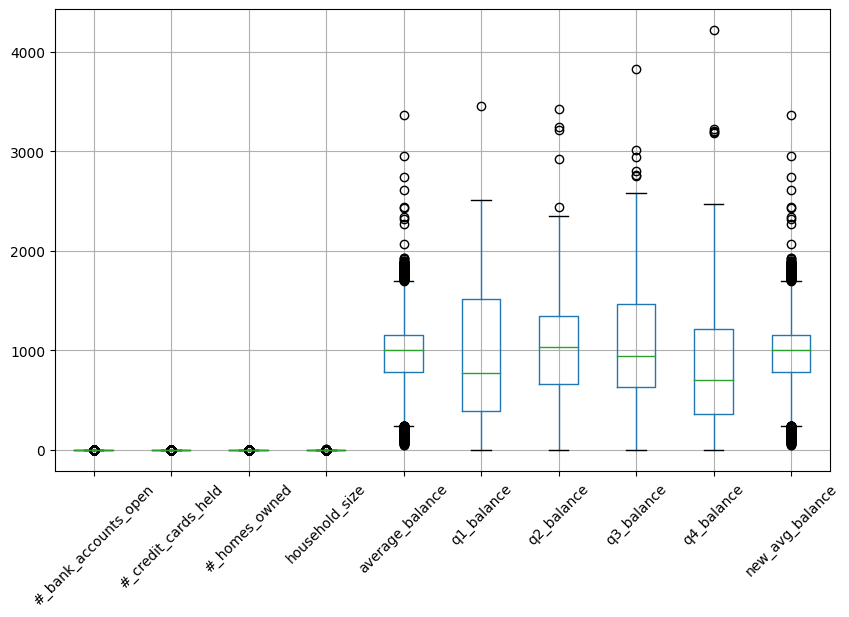

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
numerical.boxplot(ax=ax)
plt.xticks(rotation=45)
plt.show

### Transforming the data

From the plots above, one of the insights we took is that balance data should be normalized, as this is likely to improve the performance of a logistic regression model. To do so, we will apply Box Cox transformation

- First, as Box Plot can't deal with negative values, we have to check if our dataframes contain any negatives (Note: Remember that numerical_v1 includes average balance and numerical_v2 includes quarterly balance data).

Numerical_v1 does not contain any negative values. 

In [ ]:
negative_df = numerical_v1.lt(0)

num_negative_values = negative_df.sum()

print(num_negative_values)

#_bank_accounts_open    0
#_credit_cards_held     0
#_homes_owned           0
household_size          0
average_balance         0
dtype: int64


Numerical_v2 did contain negatives (less than 10), so we decided to remove them to make it Box Cox friendly.

In [ ]:
negative_df = numerical_v2.lt(0)

num_negative_values = negative_df.sum()

print(num_negative_values)

#_bank_accounts_open    0
#_credit_cards_held     0
#_homes_owned           0
household_size          0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64


Eliminating negative values from numerical v2.

In [ ]:
positive_rows = numerical_v2['q1_balance'].ge(0) & numerical_v2['q2_balance'].ge(0) & numerical_v2['q3_balance'].ge(0) & numerical_v2['q4_balance'].ge(0)

numerical_v2 = numerical_v2.loc[positive_rows, :]

- Now, we apply the Box Cox transformation to both dataframes. 

In [ ]:
import scipy.stats as stats

cols_to_transform_v1 = ['average_balance']
cols_to_transform_v2 = ['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

for col in cols_to_transform_v1:
    numerical_v1[col], _ = stats.boxcox(numerical_v1[col] + 1)

for col in cols_to_transform_v2:
    numerical_v2[col], _ = stats.boxcox(numerical_v2[col] + 1)


### Standardising the numerical data

Having applied the appropriate transformation, we now will standardise the data, which is a requirement when leveraging regression modelling. 

In [ ]:
#standardise the numerical data (without the quartely balances)
scaler = StandardScaler()
numerical_standard_v1 = scaler.fit_transform(numerical_v1)
numerical_standard_v1 = pd.DataFrame(numerical_standard_v1, columns=numerical_v1.columns)

numerical_standard_v1.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
0,-0.541352,0.121161,-0.476212,0.449452,0.616723
1,-0.541352,0.121161,1.863330,1.346760,-2.027382
2,1.575537,0.121161,-0.476212,-1.345162,-1.788324
3,1.575537,-1.133443,-0.476212,0.449452,0.806347
4,-0.541352,0.121161,-0.476212,2.244067,0.780125


In [ ]:
#standardise the numerical data (with the quartely balances)
scaler = StandardScaler()
numerical_standard_v2 = scaler.fit_transform(numerical_v2)
numerical_standard_v2 = pd.DataFrame(numerical_standard_v2, columns=numerical_v2.columns)

numerical_standard_v2.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,q1_balance,q2_balance,q3_balance,q4_balance
0,-0.541352,0.121161,-0.476212,0.449452,1.146668,-0.251899,0.184885,0.505440
1,-0.541352,0.121161,1.863330,1.346760,-1.973363,-1.998067,-2.098818,-0.696218
2,1.575537,0.121161,-0.476212,-1.345162,-0.793575,-1.420652,-1.862524,-1.048943
3,1.575537,-1.133443,-0.476212,0.449452,1.046546,1.635161,0.225748,-0.565470
4,-0.541352,0.121161,-0.476212,2.244067,1.624969,0.782233,-0.011469,-0.698780


### Dealing with outliers

The second insight we observed in our plots was that the balance columns were quite disperse, mostly likely affected by the presence of outliers. In the following section, we will deal with outliers through two different methods. 

- First, we will apply the Winsor method, which is useful if the data is not extremely skewed, as it helps us not lose data entries as it substitutes them with the closest values.

Here we will apply the Winsor method to both the v1 versions and v2 versions. 

In [ ]:
from scipy.stats.mstats import winsorize

lower_limit = 0.05
upper_limit = 0.95

numerical_standard_v2_winsorized = numerical_standard_v2.apply(lambda x: winsorize(x, limits=(lower_limit, upper_limit)))

numerical_standard_v2_winsorized.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,q1_balance,q2_balance,q3_balance,q4_balance
0,-0.541352,-1.133443,-0.476212,-1.345162,-1.699304,-1.829933,-1.780794,-1.701234
1,-0.541352,-1.133443,-0.476212,-1.345162,-1.699304,-1.829933,-1.780794,-1.701234
2,-0.541352,-1.133443,-0.476212,-1.345162,-1.699304,-1.829933,-1.780794,-1.701234
3,-0.541352,-1.133443,-0.476212,-1.345162,-1.699304,-1.829933,-1.780794,-1.701234
4,-0.541352,-1.133443,-0.476212,-1.345162,-1.699304,-1.829933,-1.780794,-1.701234


In [ ]:
lower_limit_v2 = 0.05
upper_limit_v2 = 0.95

numerical_standard_v1_winsorized = numerical_standard_v1.apply(lambda x: winsorize(x, limits=(lower_limit, upper_limit)))

numerical_standard_v1_winsorized.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
0,-0.541352,-1.133443,-0.476212,-1.345162,-1.90149
1,-0.541352,-1.133443,-0.476212,-1.345162,-1.90149
2,-0.541352,-1.133443,-0.476212,-1.345162,-1.90149
3,-0.541352,-1.133443,-0.476212,-1.345162,-1.90149
4,-0.541352,-1.133443,-0.476212,-1.345162,-1.90149


- Second, we will apply the Box Plot method to remove outliers. After playing around with the ranges and checking the performance of our model, we have decided to go for the following thesholds. 

In [ ]:
for var in numerical_standard_v2:
    q1 = numerical_standard_v2[var].quantile(0.25)
    q3 = numerical_standard_v2[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 4*iqr
    upper_bound = q3 + 4*iqr
    numerical_standard_v2_box = numerical_standard_v2[(numerical_standard_v2[var] >= lower_bound) & (numerical_standard_v2[var] <= upper_bound)]

## Working on categorical data

### Checking the distribution of categorical variables

We have plotted all categorical variables in histograms. As we had seen before, the main insight here is that our target (offer_accepted) is highly imbalanced.

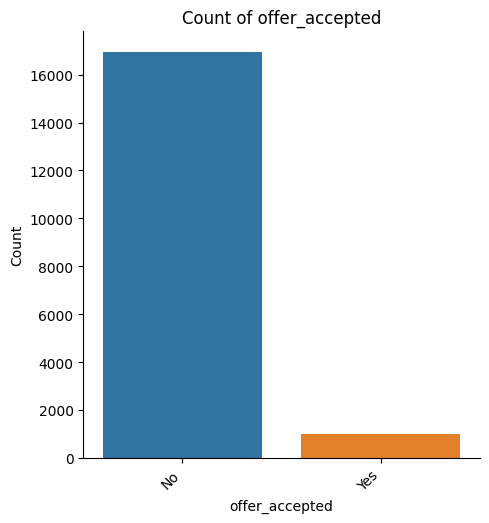

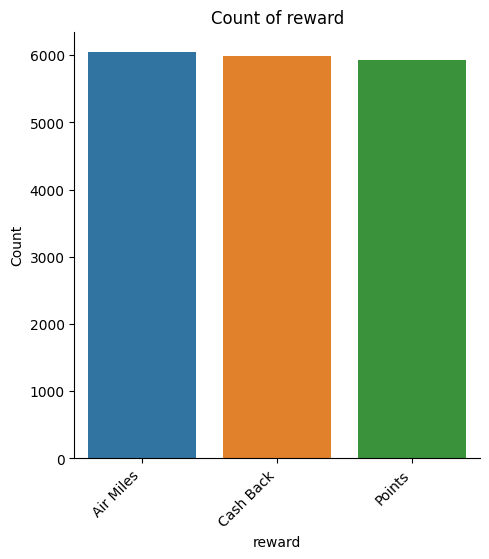

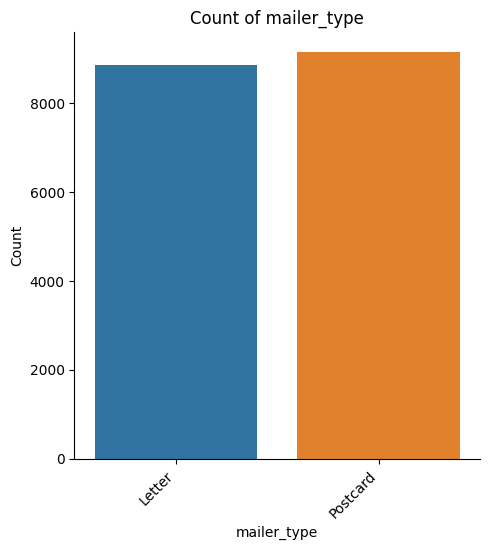

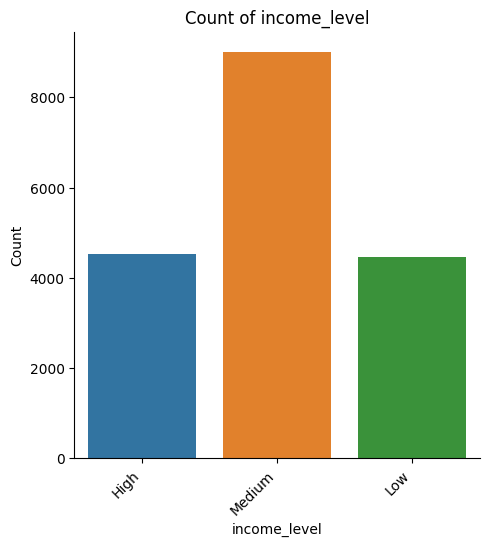

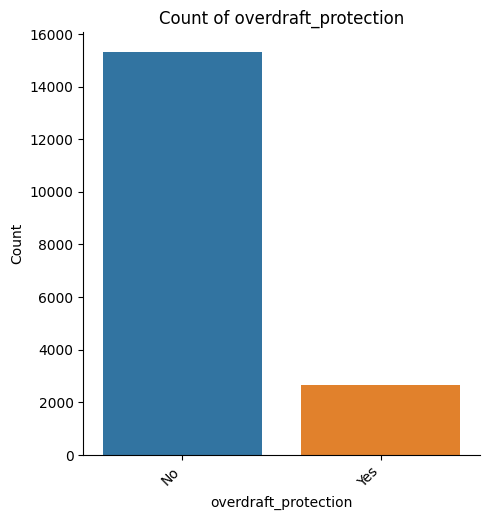

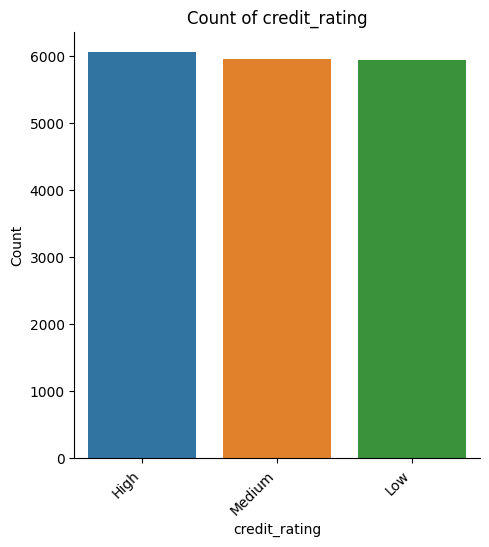

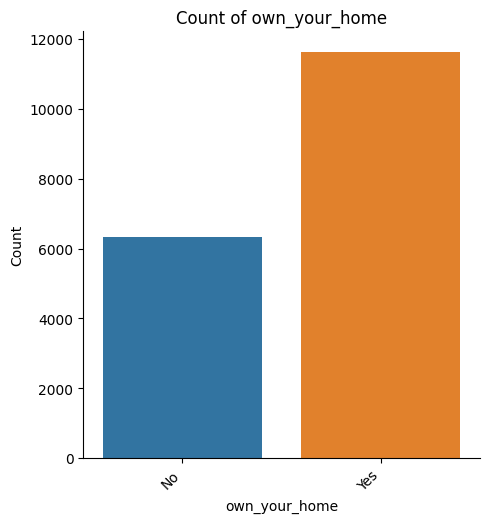

In [ ]:
#plot all categorical variables to check their distribution
for col in categorical:
    sns.catplot(x=col, kind='count', data=categorical)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right') # adjust the spacing between the labels
    plt.show()

### Checking if our independent categorical variables are highly associated

To understand if our independent categorical variables are highly associated and conclude if we should remove any or not, we will use the Chi-Square test. We will check some variables that are likely to be correlated. 

In [ ]:
#check if income_level and credit_rating are significantly associated
contingency_table = pd.crosstab(categorical['income_level'], categorical['credit_rating'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square value: {chi2:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-square value: 2.9794
p-value: 0.5613
Degrees of freedom: 4
Expected frequencies:
[[1524.43346684 1495.27214063 1499.29439252]
 [1502.84379172 1474.09546061 1478.06074766]
 [3036.72274143 2978.63239875 2986.64485981]]


We can see that for income_level and credit_rating the p value is higher than 0.05, our alpha, meaning that these variables do not show a significant association. 

In [ ]:
#check if income_level and own_your_home are significantly associated (Jesús)
contingency_table = pd.crosstab(categorical['income_level'], categorical['own_your_home'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square value: {chi2:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-square value: 2.1615
p-value: 0.3393
Degrees of freedom: 2
Expected frequencies:
[[1593.81731197 2925.18268803]
 [1571.24499332 2883.75500668]
 [3174.9376947  5827.0623053 ]]


We can see that for income_level and own_your_home the p value is higher than 0.05, our alpha, meaning that these variables do not show a significant association. 

In [ ]:
#check if credit_rating and own_your_home are significantly associated (Jesús)
contingency_table = pd.crosstab(categorical['credit_rating'], categorical['own_your_home'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square value: {chi2:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-square value: 1.0598
p-value: 0.5887
Degrees of freedom: 2
Expected frequencies:
[[2138.72719181 3925.27280819]
 [2097.81486426 3850.18513574]
 [2103.45794393 3860.54205607]]


We can see that for credit_rating and own_your_home the p value is higher than 0.05, our alpha, meaning that these variables do not show a significant association. 

### Checking the correlation between the target and other categorical velues

In [ ]:
#Checking the correlation between "offer_accepted" and the "income_level"

#Degree of Freedom for these 2 cols is 2 because we have 2 values for offer accepted and 3 values for income => (2-1)*(3-2)=2

data_crosstab1 = pd.crosstab(categorical['offer_accepted'], categorical['income_level'], margins = False)
data_crosstab1



income_level,High,Low,Medium
offer_accepted,,,
No,4354,4068,8533
Yes,165,387,469


In [ ]:
data_crosstab1.shape

(2, 3)

In [ ]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstab1, correction=False)

print("The Chi2 value is: ",round(chi2,2))
print("The p-value is: ",p_value)
print("The number of degrees of freedom is: ",dof)
print("The expected frequencies are: ")
pd.DataFrame(expected_freq, columns=data_crosstab1.columns, index=data_crosstab1.index)

The Chi2 value is:  113.62
The p-value is:  2.1293673159685707e-25
The number of degrees of freedom is:  2
The expected frequencies are: 


income_level,High,Low,Medium
offer_accepted,,,
No,4262.330051,4201.96512,8490.704829
Yes,256.669949,253.03488,511.295171


Critical value= 5.991

The Chi2 value is:  113.62 so we should reject H0 meaning there is a correlation between "offer_accepted" and the "income_level"

In [ ]:
#Checking the correlation between "offer_accepted" and the "income_level"

#Degree of Freedom for these 2 cols is 2 because we have 2 values for offer accepted and 3 values for income => (2-1)*(3-2)=2

data_crosstab2 = pd.crosstab(categorical['offer_accepted'], categorical['credit_rating'], margins = False)
data_crosstab2

credit_rating,High,Low,Medium
offer_accepted,,,
No,5945,5315,5695
Yes,119,633,269


In [ ]:
data_crosstab2.shape

(2, 3)

In [ ]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstab2, correction=False)

print("The Chi2 value is: ",round(chi2,2))
print("The p-value is: ",p_value)
print("The number of degrees of freedom is: ",dof)
print("The expected frequencies are: ")
pd.DataFrame(expected_freq, columns=data_crosstab2.columns, index=data_crosstab2.index)

The Chi2 value is:  445.06
The p-value is:  2.2697803189923953e-97
The number of degrees of freedom is:  2
The expected frequencies are: 


credit_rating,High,Low,Medium
offer_accepted,,,
No,5719.577214,5610.165777,5625.257009
Yes,344.422786,337.834223,338.742991


Critical value= 5.991

The Chi2 value is:  445.06 so we should reject H0 meaning there is a correlation between "offer_accepted" and the "credit_rating"

### Encoding the categorical variables

To encode the categoricals, we will separate our categorical variables in two sets:

- First, for ordinal categorical variables and our target we will use the Map function to encode within the same column.

- Second, for the nominal categorical variables we will use the Get Dummies function to dummify across multiple columns. 

In [ ]:
#encode the categoricals

map_cols_plus_target = categorical[['income_level', 'credit_rating', 'offer_accepted']].copy()

map_cols_plus_target['income_level'] = map_cols_plus_target['income_level'].map({"Low": 0, "Medium": 1, "High": 2})
map_cols_plus_target['credit_rating'] = map_cols_plus_target['credit_rating'].map({"Low": 0, "Medium": 1, "High": 2})
map_cols_plus_target['offer_accepted'] = map_cols_plus_target['offer_accepted'].map({"No": 0, "Yes": 1})

categorical.drop(['income_level', 'credit_rating', 'offer_accepted'], axis=1, inplace=True)

encoded_cols = pd.get_dummies(categorical, drop_first=False)

categorical = pd.concat([map_cols_plus_target, encoded_cols], axis=1, join='inner')

categorical.head()

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,income_level,credit_rating,offer_accepted,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,2,2,0,1,0,0,1,0,1,0,1,0
1,1,1,0,1,0,0,1,0,1,0,0,1
2,2,1,0,1,0,0,0,1,1,0,0,1
3,1,2,0,1,0,0,1,0,1,0,1,0
4,1,1,0,1,0,0,1,0,1,0,0,1


## Modeling

### Concatenating our categorical and numerical variables

Given that we have worked on different versions of the data, we will have different datasets to work with, with the goal of achieving the best possible model. 

- Our first dataset includes average_balance instead of quarterly data, and it is transformed using Box Cox and standardized afterwards. 

In [ ]:
# Concat the numerical and categorical data
full_data = pd.concat([numerical_standard_v1, categorical], axis=1, join='inner')

full_data.isna().sum()

#_bank_accounts_open        0
#_credit_cards_held         0
#_homes_owned               0
household_size              0
average_balance             0
income_level                0
credit_rating               0
offer_accepted              0
reward_Air Miles            0
reward_Cash Back            0
reward_Points               0
mailer_type_Letter          0
mailer_type_Postcard        0
overdraft_protection_No     0
overdraft_protection_Yes    0
own_your_home_No            0
own_your_home_Yes           0
dtype: int64

- Our second dataset includes quarterly balance data, and is also transformed using Box Cox and standardized afterwards.

In [ ]:
# Concat the numerical and categorical data (version 2 with quarterly data for balance)
full_data_v2 = pd.concat([numerical_standard_v2, categorical], axis=1, join='inner')

full_data_v2.isna().sum()

#_bank_accounts_open        0
#_credit_cards_held         0
#_homes_owned               0
household_size              0
q1_balance                  0
q2_balance                  0
q3_balance                  0
q4_balance                  0
income_level                0
credit_rating               0
offer_accepted              0
reward_Air Miles            0
reward_Cash Back            0
reward_Points               0
mailer_type_Letter          0
mailer_type_Postcard        0
overdraft_protection_No     0
overdraft_protection_Yes    0
own_your_home_No            0
own_your_home_Yes           0
dtype: int64

- Our third dataset is equivalent to v2, but having removed outliers through the Windsor method. 

In [ ]:
# Concat the numerical and categorical data (version 3 with quarterly data for balance & Winsor)
full_data_v3 = pd.concat([numerical_standard_v2_winsorized, categorical], axis=1, join='inner')

full_data_v3.isna().sum()

#_bank_accounts_open        0
#_credit_cards_held         0
#_homes_owned               0
household_size              0
q1_balance                  0
q2_balance                  0
q3_balance                  0
q4_balance                  0
income_level                0
credit_rating               0
offer_accepted              0
reward_Air Miles            0
reward_Cash Back            0
reward_Points               0
mailer_type_Letter          0
mailer_type_Postcard        0
overdraft_protection_No     0
overdraft_protection_Yes    0
own_your_home_No            0
own_your_home_Yes           0
dtype: int64

- Our fourth dataset is equivalent to v3, but instead of having applied the Winsor method to remove outliers we have applied the Box Plot method.

In [ ]:
# Concat the numerical and categorical data (version 4 with quarterly data for balance & Box Plot)
full_data_v4 = pd.concat([numerical_standard_v2_box, categorical], axis=1, join="inner")

full_data_v4.isna().sum()

#_bank_accounts_open        0
#_credit_cards_held         0
#_homes_owned               0
household_size              0
q1_balance                  0
q2_balance                  0
q3_balance                  0
q4_balance                  0
income_level                0
credit_rating               0
offer_accepted              0
reward_Air Miles            0
reward_Cash Back            0
reward_Points               0
mailer_type_Letter          0
mailer_type_Postcard        0
overdraft_protection_No     0
overdraft_protection_Yes    0
own_your_home_No            0
own_your_home_Yes           0
dtype: int64

- Finally, our fifth dataset is equivalent to v4, but instead of using quarterly data for balance we are using average_balance instead. We went for the Winsor method only to remove outliers after seeing it perform better than Box Plot. 

In [ ]:
# Concat the numerical and categorical data (version 5 with average balance & Winsor)
full_data_v5 = pd.concat([numerical_standard_v1_winsorized, categorical], axis=1, join='inner')

full_data_v5.isna().sum()

#_bank_accounts_open        0
#_credit_cards_held         0
#_homes_owned               0
household_size              0
average_balance             0
income_level                0
credit_rating               0
offer_accepted              0
reward_Air Miles            0
reward_Cash Back            0
reward_Points               0
mailer_type_Letter          0
mailer_type_Postcard        0
overdraft_protection_No     0
overdraft_protection_Yes    0
own_your_home_No            0
own_your_home_Yes           0
dtype: int64

In [ ]:
full_data_v5.head()

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance,income_level,credit_rating,offer_accepted,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,-0.541352,-1.133443,-0.476212,-1.345162,-1.90149,2,2,0,1,0,0,1,0,1,0,1,0
1,-0.541352,-1.133443,-0.476212,-1.345162,-1.90149,1,1,0,1,0,0,1,0,1,0,0,1
2,-0.541352,-1.133443,-0.476212,-1.345162,-1.90149,2,1,0,1,0,0,0,1,1,0,0,1
3,-0.541352,-1.133443,-0.476212,-1.345162,-1.90149,1,2,0,1,0,0,1,0,1,0,1,0
4,-0.541352,-1.133443,-0.476212,-1.345162,-1.90149,1,1,0,1,0,0,1,0,1,0,0,1


### Defining our dependent and independent variables

In [ ]:
#define the X and y (v1 with average balance)
y = full_data['offer_accepted']
cols_to_drop = ['offer_accepted']
X = full_data.drop(cols_to_drop, axis=1)

In [ ]:
#define the X and y (v2 with quarterly data)
y_v2 = full_data_v2['offer_accepted']
cols_to_drop = ['offer_accepted']
X_v2 = full_data_v2.drop(cols_to_drop, axis=1)

In [ ]:
#define the X and y (v3 with quarterly data and no outliers through Winsor)
y_v3 = full_data_v3['offer_accepted']
cols_to_drop = ['offer_accepted']
X_v3 = full_data_v3.drop(cols_to_drop, axis=1)

In [ ]:
#define the X and y (v4 with quarterly data and no outliers through Box Plot)
y_v4 = full_data_v4['offer_accepted']
cols_to_drop = ['offer_accepted']
X_v4 = full_data_v4.drop(cols_to_drop, axis=1)

In [ ]:
#define the X and y (v5 with average balance and no outliers through Box Plot)
y_v5 = full_data_v5['offer_accepted']
cols_to_drop = ['offer_accepted']
X_v5 = full_data_v5.drop(cols_to_drop, axis=1)

### Building a baseline model

- This model includes average_balance and has not gone through outlier removal process.

In [ ]:
#complete the train test split (Jesús)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
#run the model (Jesús)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)

In [ ]:
#evalute the model (Jesús)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label = 1)
recall = recall_score(y_test, y_pred, pos_label = 1)
f1 = f1_score(y_test, y_pred, pos_label = 1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.9443723345076952
Precision: 0.0
Recall: 0.0
F1 score: 0.0
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looking out our results, in this first model, we can see that accuracy is high because the model only predicts 'No', which is the majority of the dataset, but this makes it useless from a business perspective. It is clear we need to deal with imbalanced data to be able to predict 'Yes'.

### Building a model using SMOTE

- This model is equivalent to the previous one (containing average_balance), but we have balanced it using the SMOTE technique. 

Critically, we are resampling our training data to be able to better train the model on the positives using SMOTE.

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 100)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 30.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
classification_resampled = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_resampled, y_train_resampled)
y_pred_resampled = classification_resampled.predict(X_test)

In [ ]:
#evalute the model (Jesús)
accuracy = accuracy_score(y_test, y_pred_resampled)
precision = precision_score(y_test, y_pred_resampled, pos_label = 1)
recall = recall_score(y_test, y_pred_resampled, pos_label = 1)
f1 = f1_score(y_test, y_pred_resampled, pos_label = 1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.816614129427035
Precision: 0.14447884416924664
Recall: 0.4666666666666667
F1 score: 0.22064617809298662


We can see that the model is now more capable to predict 'Yes'. We have seen a significant improvement in Recall, meaning that when the model predicts 'Yes', it is more likely to get it right. However, Precision (that is, the share of 'Yes' the model predicted among all 'Yes' in the test data), is still way too low. 

### Building a model using Tomek Links

- Here we are trying the same model as above (with average_balance), but using a different balancing technique - Tomek Links. 

In [ ]:
from imblearn.under_sampling import TomekLinks
tomek_links = TomekLinks()
X_train_resampled_TK, y_train_resampled_TK = tomek_links.fit_resample(X_train, y_train)

In [ ]:
classification_resampled_TK = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_resampled_TK, y_train_resampled_TK)
y_pred_resampled_TK = classification_resampled_TK.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_resampled_TK)
precision = precision_score(y_test, y_pred_resampled_TK, pos_label = 1)
recall = recall_score(y_test, y_pred_resampled_TK, pos_label = 1)
f1 = f1_score(y_test, y_pred_resampled_TK, pos_label = 1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.9443723345076952
Precision: 0.0
Recall: 0.0
F1 score: 0.0
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tomek Links is not impacting performance on the basis of the baseline model, most likely because our data is still quite dispersed and it is not able to identify pairs of data points close to each other to re-sample the data and balance it. 

### Building a model using SMOTE and quarterly data for balance

- Here we are sticking to SMOTE as an balancing technique on the basis of the results we have seen before, but trying to move from average_balance to quarterly balance data, to understand if this creates and impact on the model. 

In [ ]:
#complete the train test split_v2 (Jesús)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.3, random_state=100)

In [ ]:
sm = SMOTE(random_state = 100)
X_train_resampled_v2, y_train_resampled_v2 = sm.fit_resample(X_train_v2, y_train_v2)

In [ ]:
classification_resampled_v2 = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_resampled_v2, y_train_resampled_v2)
y_pred_resampled_v2 = classification_resampled_v2.predict(X_test_v2)

In [ ]:
#evalute the model (Jesús)
accuracy = accuracy_score(y_test_v2, y_pred_resampled_v2)
precision = precision_score(y_test_v2, y_pred_resampled_v2, pos_label = 1)
recall = recall_score(y_test_v2, y_pred_resampled_v2, pos_label = 1)
f1 = f1_score(y_test_v2, y_pred_resampled_v2, pos_label = 1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.8475801965510847
Precision: 0.15567282321899736
Recall: 0.3933333333333333
F1 score: 0.22306238185255198


Comparing the performance of this model to the previous one where we were using SMOTE and average_balance, we see similar results, with slightly higher performance 

### Building a model using SMOTE and quarterly data for balance (Winsor)

- Here we use SMOTE with quarterly data for balance instead of average balance and having removed outliers using Winsor. 

In [ ]:
#complete the train test split_v2 (Jesús)
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(X_v3, y_v3, test_size=0.3, random_state=100)

In [ ]:
sm = SMOTE(random_state = 100)
X_train_resampled_v3, y_train_resampled_v3 = sm.fit_resample(X_train_v3, y_train_v3)

In [ ]:
classification_resampled_v3 = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_resampled_v3, y_train_resampled_v3)
y_pred_resampled_v3 = classification_resampled_v3.predict(X_test_v3)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#evalute the model (Jesús)
accuracy = accuracy_score(y_test_v3, y_pred_resampled_v3)
precision = precision_score(y_test_v3, y_pred_resampled_v3, pos_label = 1)
recall = recall_score(y_test_v3, y_pred_resampled_v3, pos_label = 1)
f1 = f1_score(y_test_v3, y_pred_resampled_v3, pos_label = 1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6818097533840163
Precision: 0.11605206073752712
Recall: 0.7133333333333334
F1 score: 0.1996268656716418


We see good a significant improvement in recall but the decline in precision does not work for our goal. 

### Building a model using SMOTE and quarterly data for balance (Box Plot)

- Here we stick to SMOTE and quarterly balance but remove outliers using the Box Plot method. 

In [ ]:
#complete the train test split_v2 (Jesús)
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = train_test_split(X_v4, y_v4, test_size=0.3, random_state=100)

In [ ]:
sm = SMOTE(random_state = 100)
X_train_resampled_v4, y_train_resampled_v4 = sm.fit_resample(X_train_v4, y_train_v4)

In [ ]:
classification_resampled_v4 = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_resampled_v4, y_train_resampled_v4)
y_pred_resampled_v4 = classification_resampled_v4.predict(X_test_v4)

In [ ]:
#evalute the model (Jesús)
accuracy = accuracy_score(y_test_v4, y_pred_resampled_v4)
precision = precision_score(y_test_v4, y_pred_resampled_v4, pos_label = 1)
recall = recall_score(y_test_v4, y_pred_resampled_v4, pos_label = 1)
f1 = f1_score(y_test_v4, y_pred_resampled_v4, pos_label = 1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.8475801965510847
Precision: 0.15567282321899736
Recall: 0.3933333333333333
F1 score: 0.22306238185255198


Here we see worse Recall but improving precision. However, the Winsor version looks better because the gains in precision do not compensate the massive reduction in recall. 

### Building a model using SMOTE and average balance (Winsor)

- Here we stick to SMOTE and try average balance as a feature instead of quarterly balance (using Winsor). 

In [ ]:
X_train_v5, X_test_v5, y_train_v5, y_test_v5 = train_test_split(X_v5, y_v5, test_size=0.3, random_state=100)

In [ ]:
sm = SMOTE(random_state = 100)
X_train_resampled_v5, y_train_resampled_v5 = sm.fit_resample(X_train_v5, y_train_v5)

In [ ]:
classification_resampled_v5 = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_resampled_v5, y_train_resampled_v5)
y_pred_resampled_v5 = classification_resampled_v5.predict(X_test_v5)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
#evalute the model
accuracy = accuracy_score(y_test_v5, y_pred_resampled_v5)
precision = precision_score(y_test_v5, y_pred_resampled_v5, pos_label = 1)
recall = recall_score(y_test_v5, y_pred_resampled_v5, pos_label = 1)
f1 = f1_score(y_test_v5, y_pred_resampled_v5, pos_label = 1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6818097533840163
Precision: 0.11605206073752712
Recall: 0.7133333333333334
F1 score: 0.1996268656716418


Compared to the one with SMOTE & Winsor that included quarterly balance, this model also including average balance is a lot better in terms of recall - we will stick with this set up. 

### Downsampling with average balance (Winsor)

- Here we stick with average balance and Winsor but try downsampling as a balancing method instead of SMOTE.

In [ ]:
!pip install imblearn

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_v5, y_v5)

In [ ]:
y_v5.value_counts()

0    16955
1     1021
Name: offer_accepted, dtype: int64

In [ ]:
y_rus.value_counts()

0    1021
1    1021
Name: offer_accepted, dtype: int64

In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=100)

In [ ]:
classification_down_sampled = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_rus, y_train_rus)
y_pred_rus = classification_down_sampled.predict(X_test_rus)

In [ ]:
#evalute the model (Jesús)
accuracy = accuracy_score(y_test_rus, y_pred_rus)
precision = precision_score(y_test_rus, y_pred_rus, pos_label = 1)
recall = recall_score(y_test_rus, y_pred_rus, pos_label = 1)
f1 = f1_score(y_test_rus, y_pred_rus, pos_label = 1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6639477977161501
Precision: 0.6601941747572816
Recall: 0.6688524590163935
F1 score: 0.6644951140065146


We see much better performance from a precision perspective and Recall is quite on par, for a much better F1 score. 

### Oversampling with average balance (Winsor)

- Here we try the same model as above but oversampling instead of downsampling. 

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_v5, y_v5)

In [ ]:
y_v5.value_counts()

0    16955
1     1021
Name: offer_accepted, dtype: int64

In [ ]:
y_ros.value_counts()

0    16955
1    16955
Name: offer_accepted, dtype: int64

In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=100)

In [ ]:
classification_up_sampled = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train_ros, y_train_ros)
y_pred_ros = classification_up_sampled.predict(X_test_ros)
importance = classification_up_sampled.coef_[0]
summary = pd.DataFrame(np.abs(importance.round(2)), columns=['importance'], index=X.columns)
summary = summary.sort_values('importance', ascending=False)

In [ ]:
#evalute the model (Hamideh)
accuracy = accuracy_score(y_test_ros, y_pred_ros)
precision = precision_score(y_test_ros, y_pred_ros, pos_label = 1)
recall = recall_score(y_test_ros, y_pred_ros, pos_label = 1)
f1 = f1_score(y_test_ros, y_pred_ros, pos_label = 1)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Importance:', summary)

Accuracy: 0.685835053573184
Precision: 0.6731532212355942
Recall: 0.7084907536289521
F1 score: 0.6903700833171865
Importance:                           importance
credit_rating                   0.96
reward_Cash Back                0.60
income_level                    0.55
reward_Air Miles                0.53
mailer_type_Postcard            0.53
mailer_type_Letter              0.43
average_balance                 0.20
reward_Points                   0.17
household_size                  0.14
#_credit_cards_held             0.12
#_bank_accounts_open            0.06
overdraft_protection_No         0.06
own_your_home_Yes               0.06
#_homes_owned                   0.05
overdraft_protection_Yes        0.04
own_your_home_No                0.04


This is the best model we have built from a logistic regression perspective. 

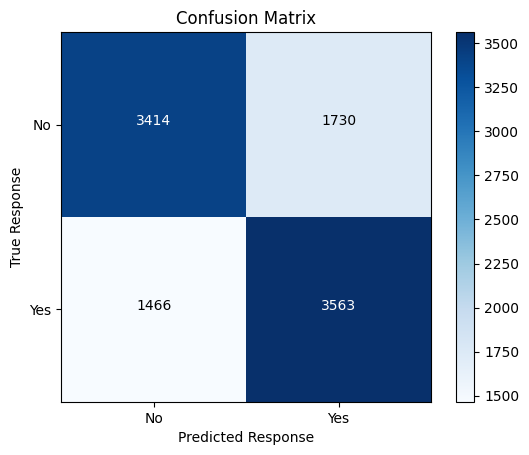

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_ros, y_pred_ros)

# plot the confusion matrix as a heatmap
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Response')
plt.ylabel('True Response')
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])

# add the values of the confusion matrix to the heatmap
thresh = cm.max() / 2.
for i, j in ((0, 0), (0, 1), (1, 0), (1, 1)):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

3307 is our True negatives values, the result of offer promo was negative and also was predicted negative.

1837 was No but we predicted it as yes so false positive.

1365 was yes but we predicted it as No so it is false negative.

3664 was yes and got predicted as yes so it is our true positive section.

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
k = 5

# Training the model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_ros, y_train_ros)

KNeighborsClassifier()

In [ ]:
# Predicting the class labels
y_pred_KNN = knn.predict(X_test_ros)

# Evaluating the performance of the model
accuracy = accuracy_score(y_test_ros, y_pred_KNN)
print("Accuracy:", accuracy)

Accuracy: 0.669320751007569


In [ ]:
for k in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ros, y_train_ros)
    
    y_pred_KNN = knn.predict(X_test_ros)

    accuracy = accuracy_score(y_test_ros, y_pred_KNN)
    

    print("Accuracy for K =", k, ":", accuracy)

Accuracy for K = 2 : 0.5831121596382581
Accuracy for K = 3 : 0.6502506635210852
Accuracy for K = 4 : 0.6569350240833579
Accuracy for K = 5 : 0.669320751007569
Accuracy for K = 6 : 0.6597857072643272
Accuracy for K = 7 : 0.6714833382483043
Accuracy for K = 8 : 0.668829253907402
Accuracy for K = 9 : 0.6747272191094073


The best result is achieved with K=7

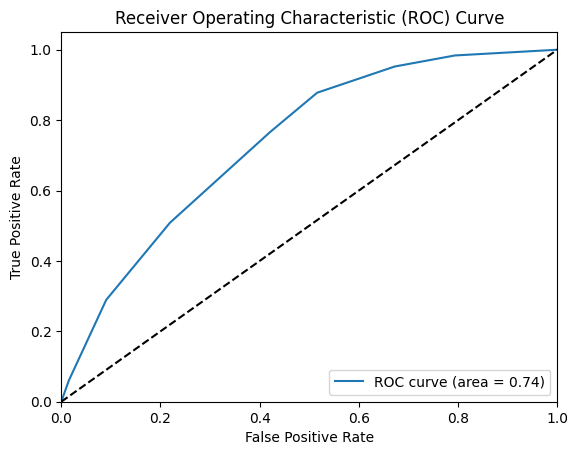

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

K = 7
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train_ros, y_train_ros)

y_pred_KNN = knn.predict(X_test_ros)

# calculating the predicted probabilities of each class
y_prob = knn.predict_proba(X_test_ros)

# calculating the ROC curve for class 1 (positive class)
fpr, tpr, thresholds = roc_curve(y_test_ros, y_prob[:, 1])

# calculating the AUC (area under the curve) score
auc = roc_auc_score(y_test_ros, y_prob[:, 1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc = roc_auc_score(y_test_ros, y_prob[:, 1])

print("AUC score:", auc)

AUC score: 0.7368312001897548


The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.        True Positive Rate (TPR) is a synonym for recall and False Positive Rate (FPR) is false positive devised by the total of false positives and true negatives.

Based on this AUC score our model is definitely working better than a random classifier, a ROC of a random classifier is shown in the graph with the dotted line.

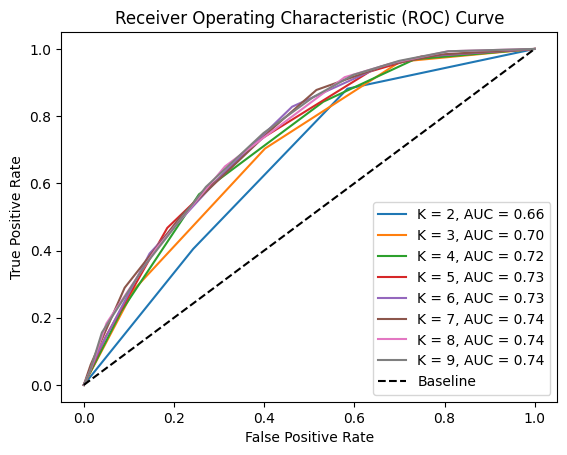

In [ ]:
auc_scores = []

for k in range(2, 10):
   
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ros, y_train_ros)

    y_pred = knn.predict(X_test_ros)
    y_prob = knn.predict_proba(X_test_ros)
    
    fpr, tpr, thresholds = roc_curve(y_test_ros, y_prob[:, 1])

    auc = roc_auc_score(y_test_ros, y_prob[:, 1])
    auc_scores.append(auc)

    plt.plot(fpr, tpr, label='K = %d, AUC = %.2f' % (k, auc))

#Checking K=1 for the baseline model
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=02b2bda3-15aa-4771-ad64-57b36bcbd937' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>